# Module 4 Part 1:  Introduction to Inference

# Table of Contents

Part 1:

* [Introduction](#introduction)


* [Learning outcomes](#Learning_Outcomes)


* [Readings and resources](#Readings_and_Resources)


* [Branches of statistics](#Branches_of_Statistics)


* [Variability in Estimates](#Variability_in_Estimates)

  * [Estimation of the standard error of the sample mean](#Estimation_of_the_Standard_Error_of_the_Sample_Mean)

  * [Confidence Intervals](#Confidence_Intervals)

  * [Exercise 1:  Computational confirmation of the CLT](#Exercise_1)

  * [Sample size](#Sample_Size)
  

* [What to do when the normality condition is not met](#What_to_do_when_the_normality_condition_is_not_met)

Part 2:

* Hypothesis Testing

  * Hypothesis testing framework

  * One- and two-sided tail tests

  * Decision errors
  
  * Hypothesis test methodology
   
  * Types of hypothesis tests
    
  * Exercise 2: Perform a hypothesis test in Python

<a id='introduction'></a>
# Introduction

This module covers the foundations of inferential statistics. The focus is on continuous variables; the next module will focus on categorical variables.  

Before going over this module you need to understand the Central Limit Theorem, presented in the previous module.

This module consists of 2 parts:

**Part 1** - Introduction to Inference

**Part 2** - Hypothesis testing

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

<a id='Learning_Outcomes'></a>
# Learning outcomes

In this module, you will learn the basics of inference and hypothesis testing. 

The two most common probability density functions to make an inference and/or an hypothesis test about the parameter of a population are covered: the Normal and Student-t distributions.

By the end of this module, you will be able to choose the correct distribution and hypothesis test type to perform a hypothesis test for continuous variables on the mean of a population.

<a id='Readings_and_Resources'></a>

# Readings and resources

We invite you to further supplement the content in this module with the following recommended text:

Diez, D., Barr, C. & Çetinkaya-Rundel, M. (2017).  Chapter 4: Foundations for inference. *OpenIntro Statistics (3rd Ed.).* https://www.openintro.org/stat/textbook.php?stat_book=os


<a id='Branches_of_Statistics'></a>

# Branches of statistics

Statistics can be divided into two branches, descriptive and inferential.  

* **Descriptive Statistics** deals with methods to summarize information about the data in a population or sample.  Typical methods are graphical and numerical tools that enable a practitioner to extract information from the data.  Descriptive statistics do not make conclusions beyond the data available, or reach conclusions regarding any hypotheses the practitioner might have made.

* **Inferential Statistics** is useful when the practitioner wants to draw a conclusion about a population with the information obtained from a sample. This is accomplished by making an estimate (i.e., an educated guess) about a parameter of a population based on sample data. The estimate must include both the actual **value** of the estimate and the **accuracy or error** associated with the estimate. It is important to acknowledge that samples are subject to variability. Because an estimate is based on a sample from a population and not the entire population, there will always be some error associated with it. If you do not provide a measure of error associated with an estimate, the estimate becomes meaningless.

You may be asking: why don't we use the information about the full population instead of relying on samples that are prone to error? The answer is feasibility, practicality, and cost. It is rare that we can access information about a population, like a census. So, we have to rely on relatively small samples to draw conclusions. Statistical theory, however, allows the practitioner to draw very accurate conclusions about a population based on a sample - and, more importantly, the  practitioner is able to measure the accuracy of their prediction.

This module lays the foundations of inferential statistics and introduces the techniques that apply to continuous variables.

Let's review some terms that have been already covered in previous modules.

A **population** represents all the items that are of interest. A **parameter** describes one attribute of the population: it provides a measure of that attribute.

A **sample** is a subset of the population of interest. The sample needs to be *representative* of the population in order to draw conclusions about the population. A way to achieve a representative sample is to make a random selection from the population.

Now we can use these terms to define statistical inference:

Statistical **inference is the process by which the practitioner makes a prediction or estimation of a population parameter based on a sample statistic**.

The process involves the statistician collecting data from a sample and evaluating the data in order to make a decision as to whether or not the data support the claim that is made about the population.

The practitioner needs to assess how good a prediction is. Because of sampling errors, a sample is not expected to perfectly represent the population, no matter how good our sampling method is. There are two measures to evaluate a prediction: the **confidence level** and the **significance level**.

 The **confidence level** can be considered to be the proportion of times an estimate is expected to be correct. 
The **significance level** measures how many times the conclusion is likely to be incorrect. These two values are set *a priori* by the practitioner, and they both sum up to 100%.

For example, if a professor predicts the final score of a course with 95% confidence (and thus 5% significance) to be between 7.5 and 8.7, in the hypothetical case that they were able to repeat the experiment a very large number of times, they would be correct 95% of the times and wrong 5% of the times in their prediction. In other words, the final score will be within the confidence interval of (7.5, 8.7) 95% of the time.

<a id='Variability_in_Estimates'></a>
# Variability in Estimates

Let's suppose we want to estimate the average, or mean, of a population. The most intuitive way is to draw a representative sample and take the average. We can reasonably assume that the sample average is a good estimator of the population average. A **point estimate** is when we choose a single value of the sample statistic to estimate the population parameter.

However, things are not that easy. If the practitioner repeats the process, the sample statistics obtained are going to be different every time. This variability in the sample mean is described as **sampling variation**. Sampling variation causes the point estimates to vary, and so each has an error associated with it. As indicated in the previous module, as the sample size increases, the rolling average approaches the true population average as more data become available.

Recall the example below. The simulation allows you to observe how the rolling average converges to the true population mean as the sample size grows:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Generate the population
mean_population = 50
stddev_population =10
population_size = 1000000
normal_data = np.random.normal(mean_population,stddev_population,population_size)

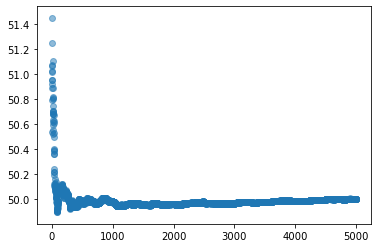

In [2]:
# Take samples from the population
nbr_samples = 5000 # rows
sample_size = 30 # columns
samples = np.random.choice(normal_data,(nbr_samples,sample_size),replace = False)

# Generate an array that counts the number of samples taken
sample_number_array=np.arange(1,nbr_samples+1)

# Calculate the rolling average
rolling_average = samples.mean(1).cumsum()/sample_number_array
rolling_average

# Plot the rolling average
plt.scatter(sample_number_array,rolling_average,alpha=0.5,marker=None,linewidths=1)
plt.show()

When the sample size is small, on the left side of the chart above, the estimator has high variability. If you rerun the code, you can observe that the shape of the curve is very unstable, and it becomes more stable to the right as the sample size increases. Mathematically, we say that the sample average, our sample statistic, converges to the true average of the population, our population parameter, as the sample size $n$ approaches (tends to) infinity.

$$
\lim_{n\to \infty} \bar X = \mu
$$

Samples are subject to **sampling variation**, so we can build up a **sampling distribution** by recording the different estimate values of our different samples. However, the **Central Limit Theorem (CLT)** tells us, as we saw previously: no matter the distribution of the original population, the sample means will always follow a normal distribution. This property, together with the characteristics of the normal distribution, form the foundation of classical or traditional statistical inference.

The variability of the sample means is described using the standard deviation, and it is called the
**standard error of the mean**.

Recall concepts from the previous module that apply to statistical inference. Let's simulate the CLT to show: 

* how the sample means form a normal distribution $X$ of average $\mu$ and 

* standard deviation $\sigma$ follows a normal distribution with average $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

Using the standard notation:

If $X \sim N(\mu, \sigma)$, then the mean from the distribution of the sample means of size $n$ $\bar X\sim N(\mu, \frac{\sigma}{\sqrt{n}})$

You will see that the first plot below simulates the percentage of data points between mean $\pm$ 1.96 standard deviations for the population.

The following plot shows how the distribution of the sample averages for a continuous distribution also follows a normal distribution.

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt, pi

def normal_pdf(x, mu, sigma):
    return 1 / (sigma * sqrt(2 * pi)) * np.exp(-(x - mu)**2 / (2. * sigma))

mean_population = 50
stddev_population =10
population_size = 10000000
normal_population = np.random.normal(mean_population,stddev_population,population_size)

In [4]:
nbr_samples = 10000 # rows
sample_size = 30 # columns
samples = np.random.choice(normal_population,(nbr_samples,sample_size),replace = False)
sample_means = samples.mean(1)
sample_size_array=np.arange(1,nbr_samples+1)

Number of data points between mean +/- 1.96 standard deviations: 95.0 %


(20, 80)

<Figure size 1080x720 with 0 Axes>

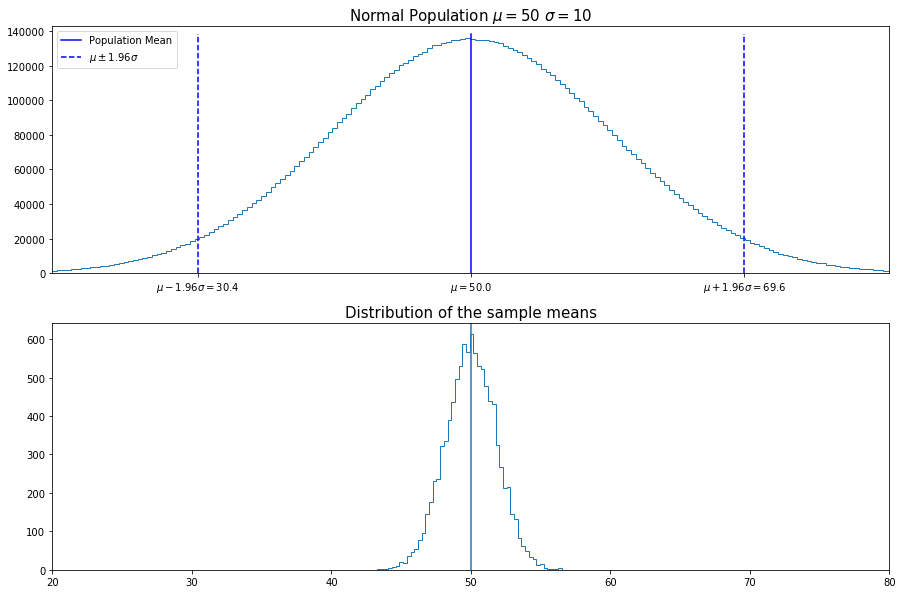

In [5]:
plt.figure(figsize=(15,10))


plt.figure(1)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.hist(normal_population,bins=300,histtype='step')

plt.title('Normal Population 'r'$\mu = {}$' r' $ \sigma = {}$'.format(mean_population,stddev_population) ,fontsize = 15)

plt.axvline(normal_population.mean(), color='blue', label='Population Mean',ymax=0.97)
plt.axvline(normal_population.mean()+1.96*normal_population.std(), color='blue', label=r'$\mu \pm 1.96   \sigma$',ymax=0.97,linestyle = 'dashed')
plt.axvline(normal_population.mean()-1.96*normal_population.std(), color='blue',ymax=0.97,linestyle = 'dashed')

plt.xticks([normal_population.mean(),
            normal_population.mean()+1.96*normal_population.std(),
            normal_population.mean()-1.96*normal_population.std()],
           ['$\mu = {}$'.format(round(normal_population.mean(),2)),
           '$\mu + 1.96 \sigma= {}$'.format(round(normal_population.mean()+1.96*normal_population.std(),2)),
           '$\mu - 1.96 \sigma= {}$'.format(round(normal_population.mean()-1.96*normal_population.std(),2))])
plt.xlim(20,80)
plt.legend(loc=2)


print('Number of data points between mean +/- 1.96 standard deviations:',round((abs(normal_population-normal_population.mean())<=1.96*normal_population.std()).sum()/normal_population.size*100),'%')


plt.subplot(212)
plt.hist(sample_means,bins=50,histtype='step')
plt.title('Distribution of the sample means', fontsize=15)
plt.axvline(normal_population.mean(),label='Population Mean')
plt.xlim(20,80)

In [6]:
print("The standard deviation of the distribution of the sample means is",
      str(round(sample_means.std(),2)), "which aproximately equals the standard deviation of the population",
      str(round(stddev_population,3)), "divided by the square root of the sample size",
      sample_size, "~",str(round(stddev_population/sqrt(sample_size),2)))

The standard deviation of the distribution of the sample means is 1.82 which aproximately equals the standard deviation of the population 10 divided by the square root of the sample size 30 ~ 1.83


Let's summarize what we have seen so far:

* **Point estimates** from a sample may be used to estimate population parameters.

* Point estimates are **not exact**, and follow a sampling distribution.

* A **sampling distribution** represents the distribution of the point estimates based on samples of a fixed size from a certain population.

* The standard deviation associated with an estimate is called the **standard error**. It represents the typical error or uncertainty associated with the estimate. In the case of estimating the mean, it is called the **standard error of the mean**.

<a id='Estimation_of_the_Standard_Error_of_the_Sample_Mean'></a>
## Estimation of the standard error of the sample mean

Invoking the **CLT**:  Given $n$ independent observations from a population with standard deviation $\sigma $, the standard error of the sample mean is equal to
$$
SE = \frac{\sigma}{\sqrt{n}}
$$

A reliable method to ensure sample observations are independent is to conduct a simple random sample consisting of less than 10% of the population.

There is one subtle issue in the equation above: the population standard deviation $\sigma$ is typically unknown. This is solved by using the point estimate of the standard deviation from the sample, $s$. This estimate tends to be good when the sample size is at least 30 and the population distribution is not strongly skewed. Thus, we often just use the sample standard deviation $s$ instead of $\sigma$. When the sample size is smaller than 30, we will need to use a method to account for extra uncertainty in the standard error. If the skew condition is not met, a larger sample is needed to compensate for the extra skew. We will elaborate how to tackle this issue when we introduce the Student-t distribution.

Using the estimation indicated above, the equation becomes:

$$
SE = \frac{s}{\sqrt{n}}
$$

<a id='Confidence_Intervals'></a>
## Confidence intervals

Point estimates are rarely perfect, so the practitioner wants to be able to provide a confidence level to their prediction. The approach is to give a **range of possible values** for the parameter, also referred as an **interval estimator**.

For example, if the practitioner wants to give a confidence level of 95% to the prediction, they will provide a 95% **confidence interval**, or in other words, a **range of possible values** that will contain the true population parameter 95% of the times (in the theoretical case that we can repeat the exercise an infinite number of times).  This is a frequentist interpretation of probability. If we take 100 samples of the population and calculate a confidence interval, the population parameter, the population mean, will be contained within this range 95% of the times (on average).

**Estimating the confidence interval for the population mean when the population standard deviation is known**

We will use 

* the **CLT**:

   $\bar X\sim N(\mu,\frac{\sigma_x}{\sqrt{n}})$

* and the properties of the **standard normal distribution**, $Z \sim N(0,1)$
where $Z$, called the $Z$-score (introduced in module 3), for a normal distribution $X \sim N(\mu,\sigma)$ is defined as

$$
Z=\frac{x-\mu}{\sigma}
$$

and if $X \sim N(\mu,\sigma)$ then $Z=\frac{x-\mu}{\sigma} \sim N(0,1)$

Let's $\alpha$ be the significance level, based on the properties of the standard normal distribution $Z$:

$$
P(-Z_\frac{\alpha}{2} \leqslant \frac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}} \leqslant +Z_\frac{\alpha}{2})=1-\alpha
$$


$$
P(\mu-Z_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}} \leqslant \bar X \leqslant \mu+Z_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}})=1-\alpha
$$

Doing some algebraic manipulations:

$$
P(\bar X-Z_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}} \leqslant \mu \leqslant \bar X+Z_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}})=1-\alpha
$$

This is equivalent to saying that with repeated sampling from this population, the proportion of values of $\bar X$ for which the interval $(\bar X-Z_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}},\bar X+Z_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}})$ includes the population mean $\mu$ is equal to $1 - \alpha$.

Based on the equations above, the **Confidence Interval of $\mu$** with a **confidence level of $1-\alpha$** is estimated as:

$\bar X-Z_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}}$ or $\bar X-Z_\frac{\alpha}{2}SE$ is the **lower confidence limit (LCL)**

$\bar X+Z_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}}$ or $\bar X+Z_\frac{\alpha}{2}SE$ is the **upper confidence limit (UCL)**

The typical value for the confidence level is 95%; however, it depends on the application of the estimation.


Let's intuitively show the meaning of the above paragraph by calculating confidence intervals using random samples from the normal population simulated above.

<function matplotlib.pyplot.show(*args, **kw)>

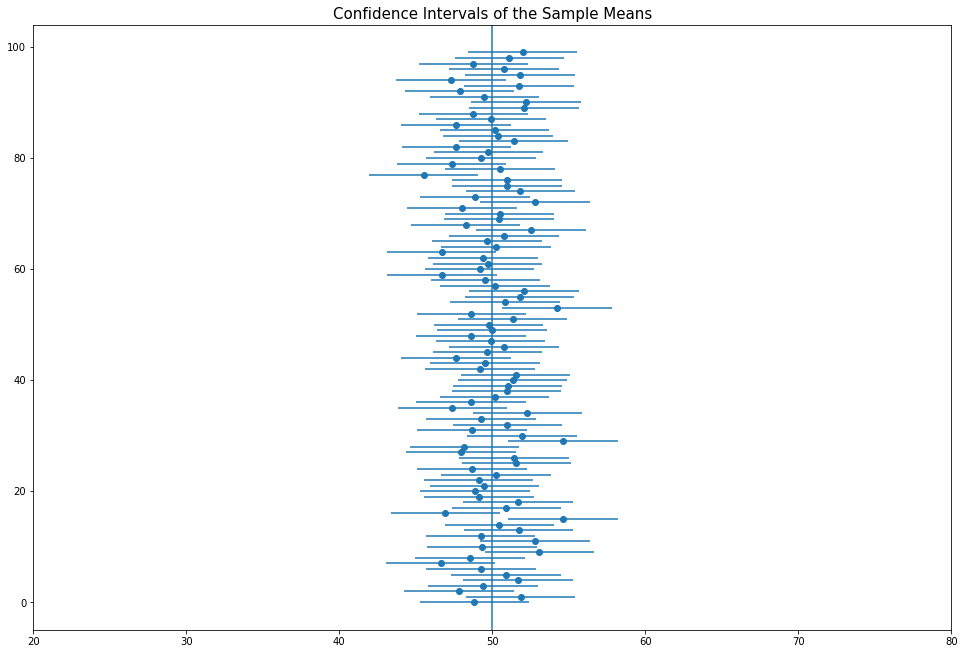

In [7]:
plt.figure(figsize=(15,10))
samples2plot = 100
plt.errorbar(sample_means[:samples2plot], np.arange(0,samples2plot),xerr=1.96*stddev_population/np.sqrt(sample_size) ,fmt='o')
plt.axvline(normal_population.mean(),label='Population Mean')
plt.title('Confidence Intervals of the Sample Means', fontsize=15)
plt.xlim(20,80)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.15,
                    wspace=0.35)
plt.show

**Conditions for $\bar x$ being nearly normal and SE being accurate**

There are important conditions to help ensure that the sampling distribution of $\bar X$ is nearly normal
and the estimate of SE is sufficiently accurate:
* The sample observations are **independent**.
* The sample size is large: $n \geqslant 30$ is a good rule of thumb.
* The population distribution **is not strongly skewed**. This condition can be difficult to evaluate, but we can use our best judgement when viewing a plot of the distribution of our samples.

**NOTE:** The larger the sample size, the more lenient we can be with the sample's skew.

You will find that the properties of the normal distribution, the CLT, and its application to the calculation of confidence intervals are the foundation for hypothesis testing.

<a id='Exercise_1'></a>
## Exercise 1:  Computational confirmation of the CLT

Simulate a uniformly distributed population of size 10,000,000. Take 10,000 random samples of size 30 and create a histogram to show the distribution of the sample means. Verify that even though the original population is uniformly distributed, the sample means follow a normal distribution. Use the code provided above to guide you.

In [8]:
#your work here

### Solution

In [9]:
# simulating a uniform distribution with mean_population = 50
population_size = 10000000
uniform_population = np.random.uniform(low=0.0, high=100.0,size=population_size)

nbr_samples = 10000 #rows
sample_size = 30 #columns
samples = np.random.choice(uniform_population,(nbr_samples,sample_size),replace = False)
sample_means = samples.mean(1)
sample_size_array=np.arange(1,nbr_samples+1)

(20, 80)

<Figure size 1080x720 with 0 Axes>

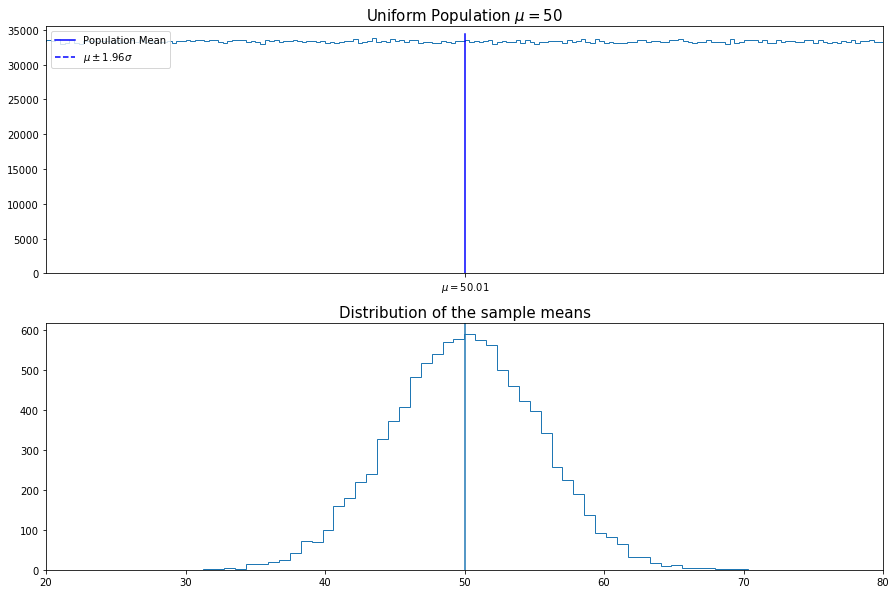

In [10]:
plt.figure(figsize=(15,10))


plt.figure(1)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.hist(uniform_population,bins=300,histtype='step')

plt.title('Uniform Population 'r'$\mu = {}$'.format(mean_population) ,fontsize = 15)

plt.axvline(uniform_population.mean(), color='blue', label='Population Mean',ymax=0.97)
plt.axvline(uniform_population.mean()+1.96*uniform_population.std(), color='blue', label=r'$\mu \pm 1.96   \sigma$',ymax=0.97,linestyle = 'dashed')
plt.axvline(uniform_population.mean()-1.96*uniform_population.std(), color='blue',ymax=0.97,linestyle = 'dashed')

plt.xticks([uniform_population.mean(),
            uniform_population.mean()+1.96*uniform_population.std(),
            uniform_population.mean()-1.96*uniform_population.std()],
           ['$\mu = {}$'.format(round(uniform_population.mean(),2)),
           '$\mu + 1.96 \sigma= {}$'.format(round(uniform_population.mean()+1.96*uniform_population.std(),2)),
           '$\mu - 1.96 \sigma= {}$'.format(round(uniform_population.mean()-1.96*uniform_population.std(),2))])
plt.xlim(20,80)
plt.legend(loc=2)


plt.subplot(212)
plt.hist(sample_means,bins=50,histtype='step')
plt.title('Distribution of the sample means', fontsize=15)
plt.axvline(uniform_population.mean(),label='Population Mean')
plt.xlim(20,80)


<a id='Sample_Size'></a>
## Sample size

Given a confidence level $\alpha$ and a desired range width for the confidence interval $B$, the sample size can be determined by using the estimator $\bar X \pm Z_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}}$ shown above.

$$
n=(\frac{Z_\frac{\alpha}{2} \sigma}{B})^2 
$$

By increasing the sample size, we narrow our confidence interval. That is to say: our prediction is more accurate. We can simulate this below:

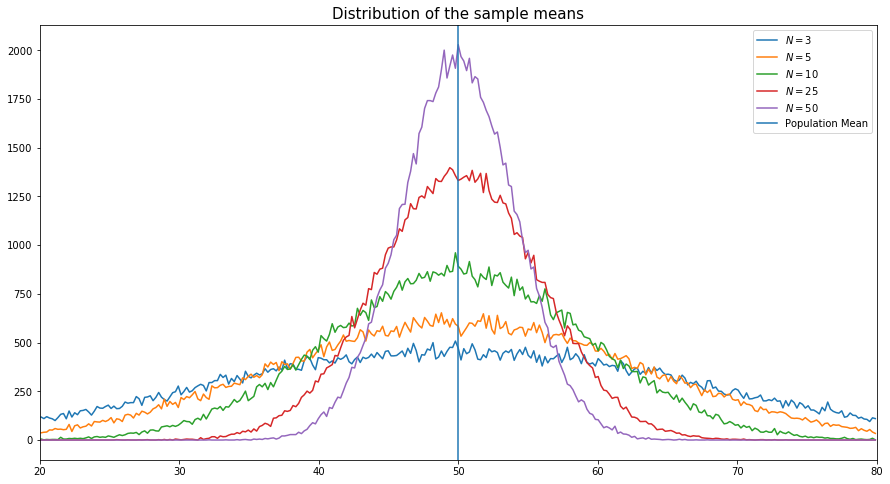

In [11]:
nbr_samples = 100000
sample_size = [3, 5, 10, 25, 50] 


plt.figure(figsize=(15,8))


for i in sample_size:
    samples = np.random.choice(uniform_population,(nbr_samples,i),replace = False)
    sample_means = samples.mean(1)

    hist, bins = np.histogram(sample_means, bins = np.linspace(20, 80, 300))
    bin_centers = (bins[1:] + bins[:-1]) / 2

    plt.plot(bin_centers, hist, label='$N={}$'.format(i))



plt.title('Distribution of the sample means', fontsize=15)
plt.axvline(normal_population.mean(),label='Population Mean')
plt.xlim(20,80)
# plt.ylim(0, 0.001)
plt.legend()
plt.show()

<a id='What_to_do_when_the_normality_condition_is_not_met'></a>
# What to do when the normality condition is not met

So far, we have assumed that the population is normal and that we know the standard deviation of the population, or that our sample is big enough that we can use the sample standard deviation as an unbiased estimator of the population standard deviation. But what if we don't know the standard deviation of the population, or can't estimate it? In this case, when we calculate $Z$ for a specific $x$, we have two unknowns: the average $\mu$ and the standard deviation $\sigma$. The normal distribution cannot be applied anymore. This issue was solved by the statistician William Sealy Gosset, who wrote under the pseudonym of "Student", by the creation of the **Student's t-distribution**.

The Student's t-distribution depends on the sample size (in other words, the distribution of the sample means) when the population standard deviation is unknown and we cannot estimate it. The Student's t-distribution depends on the **degrees of freedom** of the sample. The degrees of freedom can be calculated as the sample size minus one.

**NOTE:** When we don't know the standard deviation of the population, the normal distribution can only be applied if the sample size is big enough. Let's show this via a simulation.

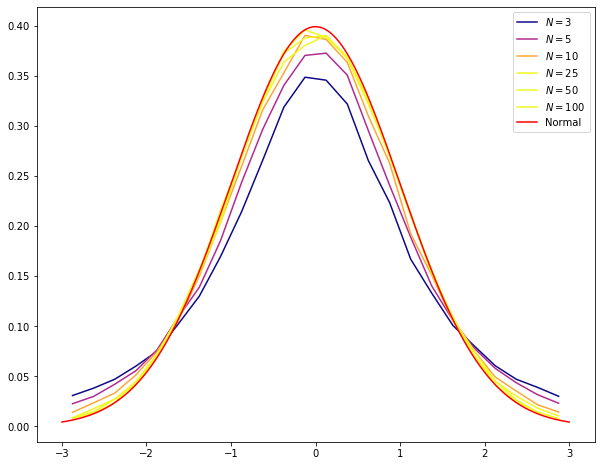

In [12]:
rochester_blue = "#00467f"

def make_hist(N, mean=50, std_dev=10, bins=25, samples=100000):
    data = []
    for i in range(samples):
        random_samples = np.random.normal(mean, std_dev, N) 
        sample_mean = np.mean(random_samples)
        sample_var = np.var(random_samples) * (N / (N - 1.0))
        #We add the sqrt(N) dependence below
        data.append((sample_mean - mean) / (np.sqrt(sample_var) / np.sqrt(N)))
    hist, bins = np.histogram(data, bins = np.linspace(-3, 3, bins))
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    #This line we changed so that we're working in probability, not counts;
    # simulated histogram is normalized after dividing by the area under the curve
    return hist / (float(samples)*(bin_centers[-1] - bin_centers[-2])), bin_centers 

N = [3, 5, 10, 25, 50, 100]
color_i = np.linspace(0, 2.0, len(N))
color_map = plt.get_cmap('plasma')
plt.figure(figsize=(10,8))
for i, Ni in zip(color_i, N):
    hist, bin_centers = make_hist(Ni)
    plt.plot(bin_centers, hist, color=color_map(i), label='$N={}$'.format(Ni))

from math import erf
x = np.linspace(-3,3,2500)
plt.plot(x,normal_pdf(x, 0, 1), label="Normal", color='r')
    
plt.legend()
plt.show()

/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Passing `n

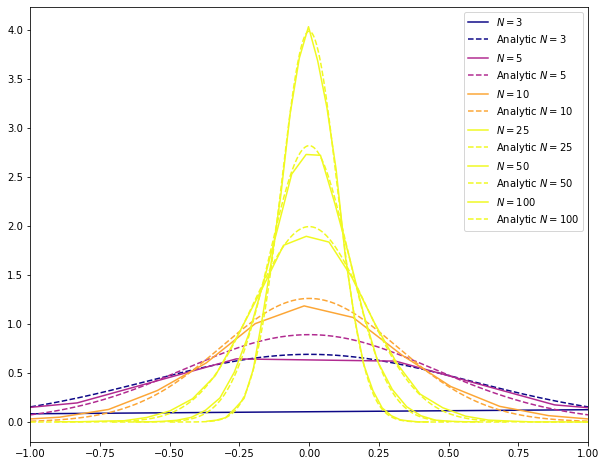

In [13]:
from math import sqrt, pi
pop_std = 1


def make_hist(N, mean=50, std_dev=10, bins=25, samples=10000):
    data = [] # we store the results here
    # We're going through the process of computing a sample mean/var this many times
    for i in range(samples):
        # create N random samples.
        random_samples = stats.norm.rvs(loc=mean, scale=std_dev, size=N)
        sample_mean = np.mean(random_samples)#We take the mean
        # compute the variance. The ddof argument tells numpy to use
        # N - ddof in the divisor. This takes care of the problem
        # with N-1 we saw from HW 3
        sample_var = np.var(random_samples, ddof=1) 
        # The sample is how far off our sample mean is from the true mean.
        # We standardize by our estimate of the sample standard deviation.
        # We do this because then our results don't depend on 
        # the standard deviation
        data.append((sample_mean - mean) / sqrt(sample_var))
    # After generating the data, we histogram with the given bin number
    hist, bins = np.histogram(data, bins, normed=True)
    # We compute the centers of the bins by averaging the intervals
    # that make up the bins
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    return hist, bin_centers


plt.figure(figsize=(10,8))
for i, Ni in zip(color_i, N):
    hist, bin_centers = make_hist(Ni, std_dev=pop_std, samples=25000)    
    plt.plot(bin_centers, hist, color=color_map(i), label="$N={}$".format(Ni))
    # plot analytic
    # make some points that span the high-probability density values
    standard_error = pop_std / np.sqrt(Ni)
    x = np.linspace(- 5*standard_error, 5 * standard_error, 500)
    plt.plot(x, stats.norm.pdf(x, scale=standard_error), color=color_map(i), label="Analytic $N={}$".format(Ni), linestyle='--')
plt.legend()
plt.xlim(-1, 1)
plt.show()

To summarize what we see above:

The distribution of the sample means is normal only when the sample size is big enough. This is important when we don't know the standard deviation of the population, and we rely on the standard deviation of the sample.

Notice that the distributions have thicker tails than the normal distributions. As a result, our confidence intervals will need to be wider for a given confidence level. This is the price of not knowing the standard deviation of the population.

Remember, if we know the standard deviation of the population, the normal distribution can be used to make estimates.

When we cannot apply the normal distribution, we have to use the Student's t-distribution. We can show via a simulation how it converges to a normal distribution.

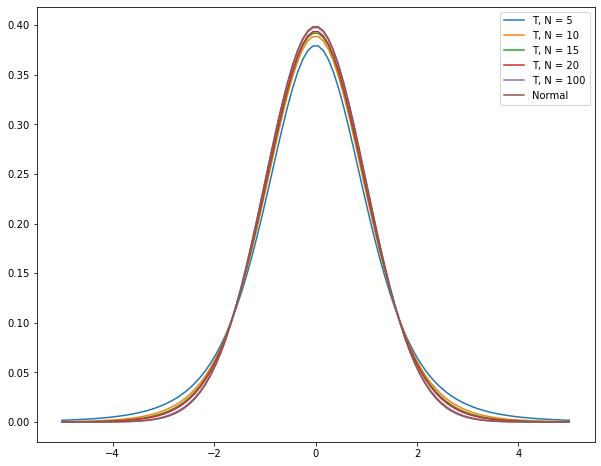

In [14]:
N = [5, 10, 15, 20, 100]
# make some points
x = np.linspace(-5,5, 100)

# Compute pdf on t and normal
yn = stats.norm.pdf(x)

plt.figure(figsize=(10,8))
for Ni in N:
    y = stats.t.pdf(x, df=Ni)
    plt.plot(x,y, label="T, N = {}".format(Ni))    
plt.plot(x,yn, label="Normal")
plt.legend()

plt.show()

#### In summary:

* If we know the standard deviation of the population we can use the normal distribution.

* If we don't know the standard deviation of the population, we have to estimate it with the standard deviation of the sample, and we have to use the Student's t distribution.

* When the sample size is big enough, the Student's t distribution can be approximated by the normal distribution. How big is 'big enough' depends on the symmetry of the population.  

* The shape of the t distribution depends on the sample size (which is related with the degrees of freedom).

* As a rule of thumb, if the sample size is bigger than 25~30, we can approximate the t distribution using the normal distribution even if we don't know the standard deviation of the population.  

**End of Part 1.**

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.